# Principal Component Analysis (PCA)

## Overview
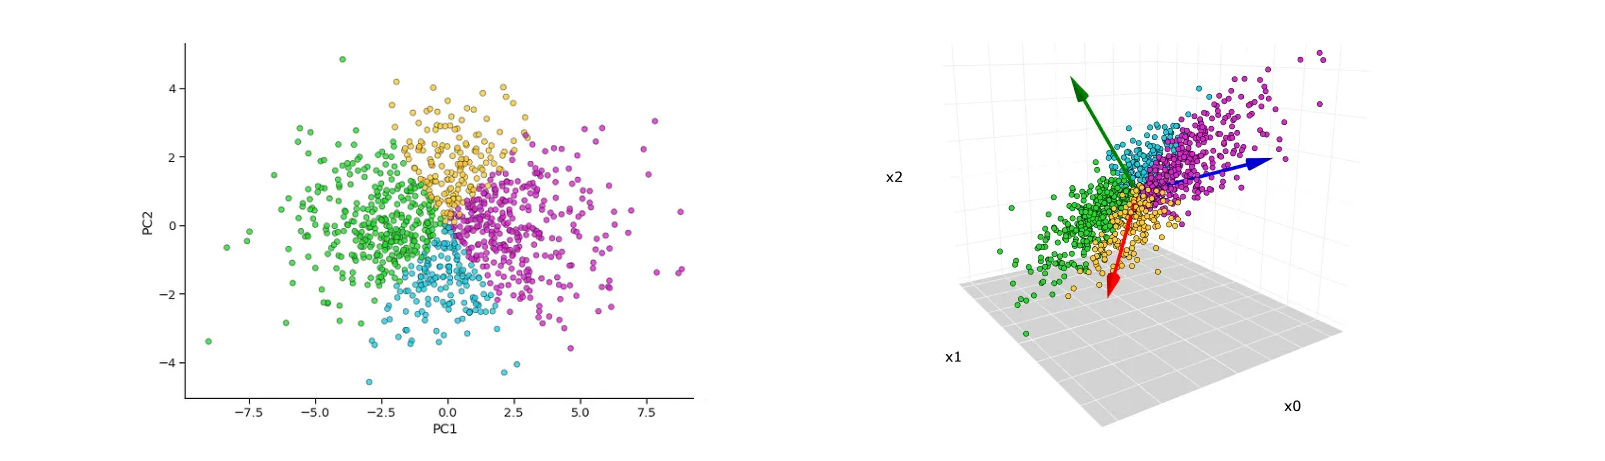
<span style="font-size: 11pt; color: steelblue; font-weight: bold">**Principal Component Analysis (PCA)**</span> is the one of the most important <u>dimensionality reduction techniques</u> — <u>techinques used to transform high-dimensional data into a lower-dimensional representation</U> <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">while preserving most of the original variance</span>. It achieves that by finding the <span style="font-size: 11pt; color: steelblue; font-weight: bold">**principal components**</span>, which are orthogonal directions capturing the maximum variance in the data. 

<span style="font-size: 11pt; color: steelblue; font-weight: bold">**Principal Component Analysis**</span> leverages use of <span style="font-size: 11pt; color: goldenrod; font-weight: bold">*eigenvectors*</span> and <span style="font-size: 11pt; color: goldenrod; font-weight: bold">*eigenvalues*</span> to find the optimal lower-dimensional representation (capturing the most variance) of high-dimensional data. By computing the eigenvectors and eigenvalues of the <span style="font-size: 11pt; color: goldenrod; font-weight: bold">*covariance matrix*</span> of the standardized data, <u>PCA determines the directions along which the data exhibits the most significant variance</u>.

***
<span style="font-size: 11pt; color: steelblue; font-weight: bold">**Principal Component Analysis (PCA)**</span> was first introduced by **Karl Pearson** in 1901. Later, it was independently developed and popularized in the statistics community by **Harold Hotelling** in the 1930s.
***

## Implementation Steps

- **Standardize the Data**: Prior to applying PCA, it is crucial to standardize the data by subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features have comparable scales and no single feature dominates the analysis.

- **Compute the Covariance Matrix $Cov(X, X)$**: The covariance matrix is calculated from the standardized data to gain insights into the relationships between different features. It shows how features vary together and provides valuable information for PCA.

- **Calculate Eigenvectors and Eigenvalues**: The next step involves computing the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the principal components, and eigenvalues indicate the amount of variance explained by each principal component.

- **Sort Eigenvectors**: Sort the eigenvectors according to their corresponding eigenvalues in decreasing order. This step prioritizes the most significant principal components.

- **Scree Plot**: To visualize the amount of variance explained by each principal component, plot the eigenvalues on the y-axis against the corresponding principal components on the x-axis. The scree plot aids in determining the appropriate number of principal components to retain.

- **Choose the Top k Eigenvectors**: Select the first k eigenvectors that capture the most variance. These will be used as the new k dimensions of the transformed data.

- **Transform the Data**: Perform the transformation by projecting the original n-dimensional data points into the new k-dimensional space using dot products with the selected eigenvectors.

**NOTE:** 
In a Scree plot, the x-axis represents the principal components, ordered from the first to the last, while the y-axis represents the corresponding eigenvalues. Each eigenvalue represents the amount of variance explained by its corresponding principal component.

**NOTE:**
PCA can also be implemented using <span style="font-size: 11pt; color: steelblue; font-weight: bold">**Singular Value Decomposition (SVD)**</span>, which is a <u>matrix factorization technique</u>. SVD is mathematically equivalent to the eigenvalue decomposition which we have used to find principal components, but in some cases it can provide additional numerical stability.

## PCA Applications:
PCA is widely used in various fields, including:

- Data pre-processing for Machine Learning algorithms.
- Feature engineering in Machine Learning tasks, where it can reduce computational complexity and improve model performance.
- Image Compression, where PCA is used to reduce the dimensionality of image data while preserving essential information.
- Data compression and storage.
- Data visualization.
- Anomaly detection.
- Noise reduction in signal processing.

***
Now we will implement Principle Component Analysis using two different methods:
- With custom function written with the help of NumPy library
- With the help of scikit-learn library
***

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA as sklearn_PCA

# Loading data

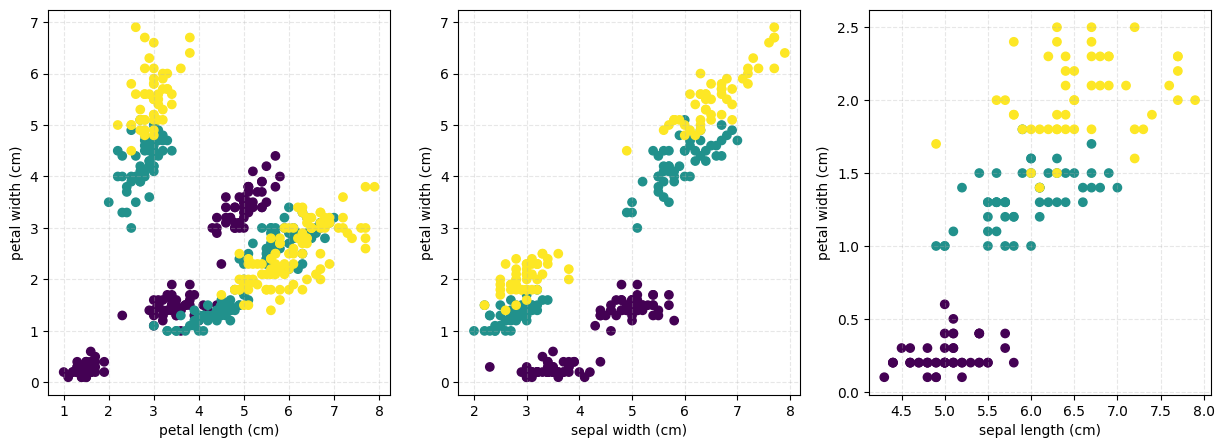

In [2]:
# Load the Iris dataset
data = datasets.load_iris()
iris_features = data['data']
iris_labels = data['target']
feature_names = data['feature_names']

# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(15, 5))
for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(1, 3, j-i)
        # c=Y: This argument specifies the color for each data point based on the values in the Y variable 
        # (class labels). Each unique value in Y will be mapped to a specific color in the scatter plot.
        plt.scatter(iris_features[:, i], iris_features[:, j], c=iris_labels, cmap='viridis')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid(True, ls='dashed', alpha=0.3)
        
plt.show()

# Principle Component Analysis with NumPy

In [3]:
class numpy_PCA:
    def __init__(self, n_components):
        """
        Initialize the PCA object.

        Parameters:
        - n_components (int): The number of principal components to retain after transformation.
        """
        self.n_components = n_components
        self.eigenvalues = None
        self.components = None
        self.mean = None

        
    def fit(self, data):
        """
        Fit the PCA model on the input data.

        Parameters:
        - data (numpy.ndarray): The input data, where rows represent samples and columns represent features.

        Note:
        This method performs mean centering of the data, computes the covariance matrix, 
        and calculates the eigenvectors and eigenvalues.
        """
        # Perform mean centering of each row in data
        self.mean = np.mean(data, axis=0)
        data = data - self.mean

        # Compute the covariance matrix, functions needs samples as columns, so transpose
        cov_matrix = np.cov(data.T) 
        
        # Compute eigenvectors and eigenvalues
        self.eigenvectors, self.eigenvalues = np.linalg.eig(cov_matrix)
        
        # Transpose eigenvectors to be column vectors for easier calculations later
        self.eigenvectors = self.eigenvectors.T
        
        # Sort the eigenvectors according to the eigenvalues in decreasing order
        idxs = np.argsort(self.eigenvalues)[::-1] # slicing for decreasing order
        self.eigenvalues = self.eigenvalues[idxs]
        self.eigenvectors = self.eigenvectors[idxs]
        
        # Save the needed k dimensions (first n_components) that will account for the most variance in the data
        self.components = self.eigenvectors[:self.n_components]
        
    def transform(self, data):
        """
        Transform the input data into the lower-dimensional space using the fitted PCA model.

        Parameters:
        - data (numpy.ndarray): The input data to be transformed.

        Returns:
        - numpy.ndarray: The transformed data in the lower-dimensional space.
        """
        # Project data by subtracting the mean
        data = data - self.mean

        # Perform the transformation using dot product with the principal components
        return np.dot(data, self.components.T)
    

Shape before transformation: (150, 4)
Shape after transformation: (150, 2)


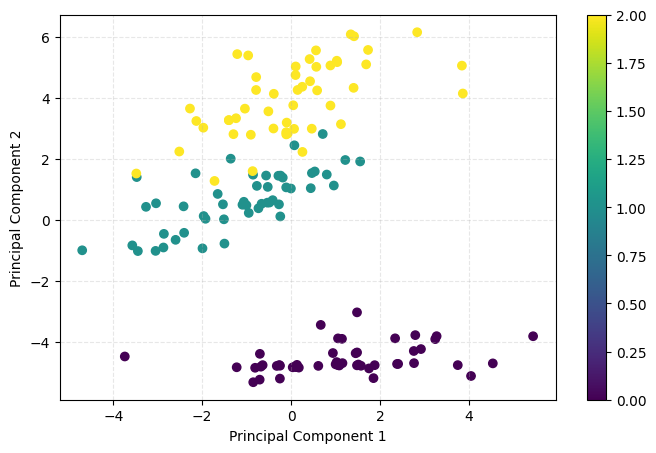

In [4]:
# Create a PCA (Principal Component Analysis) object with 2 components.
numpy_pca = numpy_PCA(2)

# Fit the PCA model to the data.
numpy_pca.fit(iris_features)

# Transform the original features to the new lower-dimensional representation.
iris_features_transformed = numpy_pca.transform(iris_features)

# Print the shape of the data before and after transformation.
print("Shape before transformation:", iris_features.shape)
print("Shape after transformation:", iris_features_transformed.shape)

# Create 2D scatter plots for different feature combinations
plt.figure(figsize=(8, 5))
for i in range(iris_features_transformed.shape[1]):
    for j in range(i+1, iris_features_transformed.shape[1]):
        plt.scatter(iris_features_transformed[:, i], iris_features_transformed[:, j], c=iris_labels, cmap='viridis')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.grid(True, ls='dashed', alpha=0.3)
        plt.colorbar()

plt.show()

# Principle Component Analysis with Sci-Kit Learn

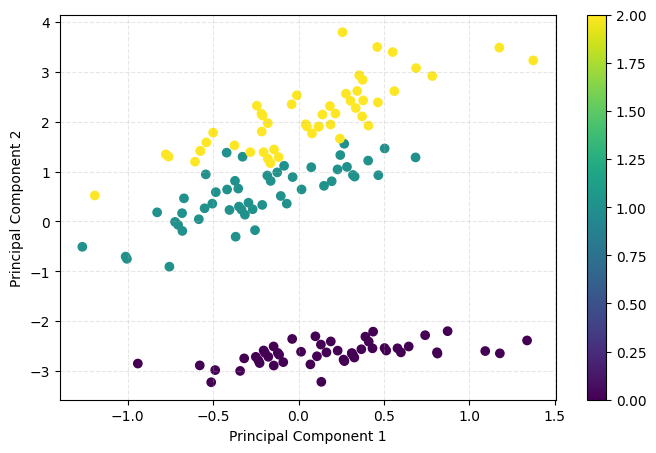

In [5]:
# Create a PCA (Principal Component Analysis) object with 2 components.
sklearn_pca = sklearn_PCA(2)

# Fit the PCA model to the data.
sklearn_pca.fit(iris_features)

# Transform the original features to the new lower-dimensional representation.
iris_features_transformed = sklearn_pca.transform(iris_features)

# Create a 2D scatter plot for different combinations of the two principal components.
plt.figure(figsize=(8, 5))
for i in range(iris_features_transformed.shape[1]):
    for j in range(i+1, iris_features_transformed.shape[1]):
        plt.scatter(iris_features_transformed[:, j], iris_features_transformed[:, i], c=iris_labels, cmap='viridis')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.grid(True, ls='dashed', alpha=0.3)
        plt.colorbar()

# Adjust plot layout for better visualization.
plt.show()


# Scree Plot: the variance explained by each Principal Component

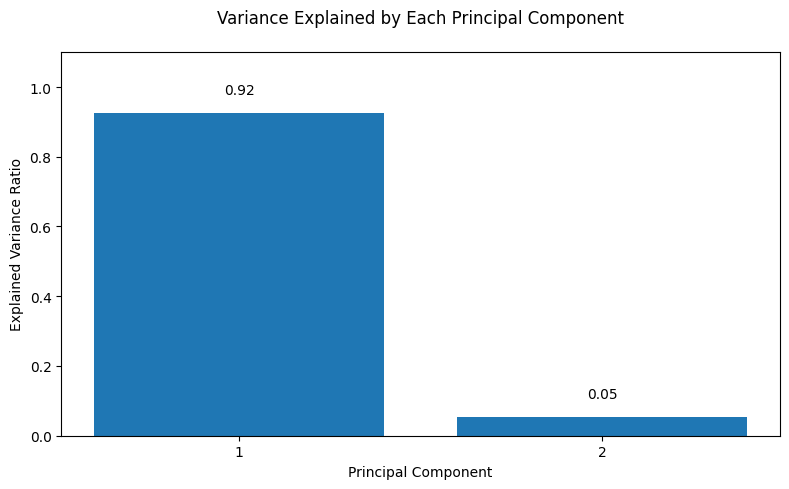

In [6]:
# Obtain the variance explained by each component
variance_explained = sklearn_pca.explained_variance_ratio_

# Plot the scree plot using a bar plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, sklearn_pca.n_components + 1), variance_explained, align='center')

plt.title('Variance Explained by Each Principal Component\n')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([1, 2])
plt.ylim([0, 1.1])

# Add variance ratio values for each bar on top of it
for i, value in enumerate(variance_explained):
    plt.text(i + 1, value, f'{value:.2f}\n', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Conclusion

In our exploration of Principal Component Analysis (PCA) using both NumPy and scikit-learn, we noticed that the results were slightly different. Despite this discrepancy, we can conclude that both implementations have achieved the same goal: reducing the dimensionality of the dataset while preserving its variance and capturing the most important features.

The minor differences observed in the results between the NumPy and Scikit-learn implementations could be attributed to variations in numerical precision or slight differences in the underlying algorithms used in each library. However, it is essential to note that the core principles of PCA remain consistent across both implementations.